In [3]:
import pandas as pd

df = pd.read_csv("../data/titanic/train.csv")
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## 결측치 처리

df['Age'] = df['Age'].fillna(df['Age'].mean()) ## inplace 결과를 원본 DataFrame에 바로 반영 3.0부터 없어짐
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # mode() 최빈값 list

In [6]:
## 범주형 인코딩

df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

df = pd.get_dummies(df,columns=['Embarked']) ## 값을 one-hot encoding 방식으로 변경

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True


In [11]:
## 이상치 탐지

Q1 = df['Fare'].quantile(0.25) # quantile 특정 분위수
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1 # 3사분위수(0.75) - 1사분위수(0.25) 의미는 중앙 50%의 데이터 범위

## 이상치는  x < Q1 - IQR * 1.5 or x > Q3 + IQR * 1.5

df = df[(df['Fare'] >= Q1- 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

In [12]:
## 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age', 'Fare']]) #정규화 함수


In [17]:
## 학습용 데이터

from sklearn.model_selection import train_test_split

features = ['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[features]
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
## 모델 학습
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, Y_train)



RandomForestClassifier(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

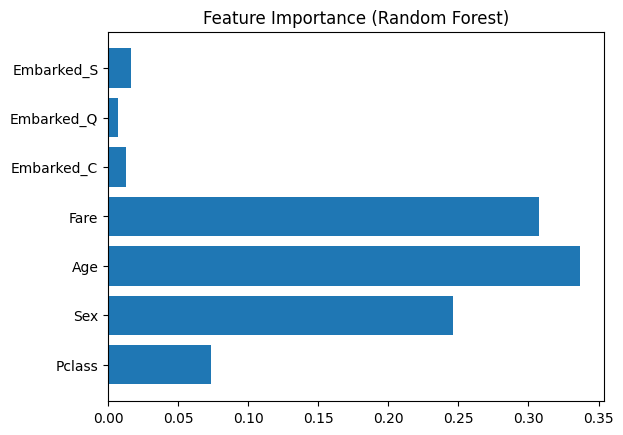

In [20]:
import matplotlib.pyplot as plt

# feature_importance 확인

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.show

In [21]:
## 테스트 결과 확인

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\n[Confusion Matrix]")
print(confusion_matrix(Y_test, Y_pred))

print("\n[Classification Report]")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7876712328767124

[Confusion Matrix]
[[81 19]
 [12 34]]

[Classification Report]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       100
           1       0.64      0.74      0.69        46

    accuracy                           0.79       146
   macro avg       0.76      0.77      0.76       146
weighted avg       0.80      0.79      0.79       146

